# 1 - Individual Values

Over the last four lessons, we focused on distributions as a whole and learned to summarize entire distributions and measure their variability. In this lesson, we'll switch the focus to the individual values in a distribution and learn a few statistical techniques that can help us answer practical questions.

We'll continue working with our data set on house prices:

| | Order | PID | MS SubClass | MS Zoning | Lot Frontage | Lot Area | Street | Alley | Pool QC | Yr Sold | Sale Type | Sale Condition | SalePrice |        
|-------|-----|-------------|-----------|--------------|----------|--------|-------|---------|---------|-----------|----------------|-----------|--------|
| 0     | 1   | 526301100   | 20        | RL           | 141.0    | 131770 | Pave  | 0       | 5       | 2010      | WD             | Normal    | 215000 |
| 1     | 2   | 526350040   | 20        | RH           | 80.0     | 11622  | Pave  | 0       | 6       | 2010      | WD             | Normal    | 105000 |
| 2     | 3   | 526351010   | 20        | RL           | 81.0     | 14267  | Pave  | 0       | 6       | 2010      | WD             | Normal    | 172000 |
| 3     | 4   | 526353030   | 20        | RL           | 93.0     | 11160  | Pave  | 0       | 4       | 2010      | WD             | Normal    | 244000 |
| 4     | 5   | 527105010   | 60        | RL           | 74.0     | 13830  | Pave  | 0       | 3       | 2010      | WD             | Normal    | 189900 |

Let's sample randomly one sale price from the **SalePrice** column and see what can we say about the sampled value:



In [0]:
import pandas as pd
houses = pd.read_csv('AmesHousing_1.csv')

print(houses['SalePrice'].sample(1, random_state = 0))



2216    220000
Name: SalePrice, dtype: int64


We can see we got a price of US 220,000. Is a house costing US 220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether US 220,000 is below or above the mean:

In [0]:
print(houses['SalePrice'].mean())

180796.0600682594


The sampled house (US 220,000) is clearly more expensive than the average house (roughly US180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

To see why this is true, consider below two normally-distributed samples of sale prices (we made this simplifying assumption of normality for teaching purposes). Both samples have the same mean $\bar{x} = 180k$, but the sample standard deviations $s$ are different (on the left, $s=40000$ , while on the right $s=10000$). For formatting purposes, we'll denote thousands with "k", so 180,000 will become 180k:

<img width="550" src="https://drive.google.com/uc?export=view&id=14-z_LWIWnUvRyQktOpzjJVUMIDgNHFR9">


For the sample a with greater standard deviation ($s=40000$), we can see that US 220,000 is fairly close to the mean, indicating that houses at that price are common and thus not very expensive (relative to the other houses on the market).

For the other sample ($s=10000$), we see US 220,000 on the far right of the distribution, indicating that houses at that price are uncommon and thus very expensive (relative to the other houses on the market).

Now let's try to figure out how far off from the mean a value of US 220,000 is in the distribution of the **SalePrice** variable.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a kernel density plot for the **SalePrice** variable to find out how far off  US 220,000 is from the mean.
  - Generate the plot using **Series.plot.kde()**.
    - The limits of the x-axis should be the minimum and the maximum value of the **SalePrice** variable. To set the limits you can use the **xlim** parameter of **Series.plot.kde()**.
  - Plot a vertical line to indicate visually the location of the mean using **plt.axvline()**.
      - The color of the line should be black, and its label should be 'Mean'. You can use the **color** and **label** parameters of **plt.axvline()**.
  - Plot a vertical line to indicate visually the standard deviation distance above the mean — you'll have to generate a vertical line for the sum of the mean and standard deviation.
    - Assume that the data is a population and compute the standard deviation without using Bessel's correction.
    - The color of the line should be red and its label should be 'Standard deviation'.
  - Plot a vertical line for the US 220,000 price.
    - The color of the line should be orange and its label should be '220000'.
  - Display all the labels using **plt.legend()**.
- Examine the graph and figure out whether a price of US 220,000 is very expensive. If it's very expensive, assign True to variable named **very_expensive**, otherwise assign **False**.

In [0]:
# put your code here

# 2 -  Number of Standard Deviations

Previously, we determined whether US 220,000 is expensive or not by considering both the mean and the standard deviation of the distribution. We found an answer using a kernel density plot, but overall the process took more steps than it was ideal, and we also relied on a visual estimate which lacks high precision.

We need to find a faster and more precise way to measure how far off a value is from the mean (taking into account at the same time the standard deviation of the distribution). Let's take another look at the two distributions we discussed in the previous section:

<img width="550" src="https://drive.google.com/uc?export=view&id=14-z_LWIWnUvRyQktOpzjJVUMIDgNHFR9">

For each distribution, the distance between US 220,000 and the mean US 180,000 is US 40,000. For the distribution on the left, this distance of US 40,000 is exactly equal to its standard deviation. With this in mind, we could say that US 220,000 is one standard deviation away from the mean — this is the same as saying US 220,000 is US 40,000 away from the mean (because "one standard deviation" is equivalent to US 40,000).

For the distribution on the right, the standard deviation is US 10,000. The distance between US 220,000 and US 180,000 is still US 40,000, but in this case US 40,000 is four times greater than the standard deviation of US 10,000. We could thus say that US 220,000 is four standard deviations away from the mean — this is the same as saying that US 220,000 is US 40,000 away from the mean (because "four standard deviations" is equivalent to US 40,000, since one standard deviation is US 10,000, and $4\times 10000 = 40000$ ).

<img width="300" src="https://drive.google.com/uc?export=view&id=1SntzEeL_a_Y0Dc6wJry7Fhzlvjz2ifRY">


So it looks like we can measure how far off a value is from the mean in terms of number of standard deviations. If a price of US 220,000 is one standard deviation away from the mean, then we can conclude that this value is relatively close to the mean, and it's not very expensive compared to the other prices in the distribution.

If a price of US 220,000 is four standard deviations away from the mean, then we know that this value is very far away from the mean. This means that US 220,000 is very uncommon and very expensive compared to the other prices in the distribution.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Find out the number of standard deviations away from the mean for a price of US 220,000 in the distribution of the **SalePrice** variable.
  - Measure the distance between US 220,000 and the mean of the **SalePrice** column.
  - Divide the distance by the standard deviation of the **SalePrice** column (assume the data we have is a population) to find the number of standard deviations away from the mean.
    - Assign your result to a variable named **st_devs_away**.
    - If you can't understand why we divide, think about this way: if we have a distance of 6 and a standard deviation of 2, then that is three standard deviations away because 6:2 = 3.
  - Does the number of standard deviations match our visual estimate from the last exercise?



In [0]:
# put your code here

# 3 - Z-Scores

In the previous exercise, we managed to find the number of standard deviations away from the mean for a value of US 220,000 by:
  - Finding the distance between the value and the mean (by subtracting the mean from that value).
  - Dividing the distance by the standard deviation of the distribution.

Let's try to describe this process algebraically: for any value $x$  in a population with mean  $\mu$ and standard deviation $\sigma$ , the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with z:

$
\displaystyle z = \frac{x - \mu}{\sigma}
$

The value representing the number of standard deviations away from the mean is commonly known as the **standard score**, or the **z-score**. We'll use the term **"z-score"** throughout our courses.

Z-scores can also be defined fairly easy for samples. For any value $x$ in a sample with mean  $\bar{x}$ and standard deviation $s$ (with Bessel's correction), the *z-score* $z$  is given by the formula:

$
\displaystyle z = \frac{x - \bar{x}}{s}
$

The z-scores we've dealt with so far were all positive, but we can have negative z-scores as well. Let's consider again one of the samples from the last section (the one with a mean $\bar{x}$ of  US 180,000, and a standard deviation of US 40,000). A price of US 100,000 will have a z-score of -2:


$
\displaystyle z = \frac{100000 - 180000}{40000} = -2
$

<img width="300" src="https://drive.google.com/uc?export=view&id=1lYzBlkD3NIfsDZFQDJDrGJjOP2HcBcJt">

We can see that a z-score has two parts:

- The sign, which indicates whether the value is above or below the mean.
- The value, which indicates the number of standard deviations that a value is away from the mean.

Generally, the sign of a z-score is written out even if the z-score is positive. If a value is two standard deviations away from the mean, we should write that the z-score is +2, not 2.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Write a function that takes in a value, the array the value belongs to, and returns the z-score of that value. Inside the function's definition:
  - Compute the mean of the array.
  - Compute the standard deviation of the array. Make sure your function is flexible enough to compute z-scores for both samples and populations.
    - You can use the std() function from numpy.
  - Find out the distance between the value and the mean of the array.
  - Compute the z-score by dividing the distance to the standard deviation of the array.
  - Return the z-score.
- Compute the z-score for **min_val, mean_val, max_val**, which are already defined in the code editor. Assume that the values come from a population.
  - Assign the z-score for **min_val** to a variable named **min_z**.
  - Assign the z-score for **mean_val** to a variable named **mean_z**.
  - Assign the z-score for **max_val** to a variable named **max_z**.


In [0]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

# put your code here

# 4 - Locating Values in Different Distributions

Let's now consider an example that's suggestive for the kind of questions we can answer using z-scores.

Let's say we're working as data analysts for a **real estate** company, and we want to **find the best neighborhood in Ames to invest** in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and **we want to target our investment based on location.**

The company budgeted US 10,000,000 for this investment, and the plan is to buy 50 houses of  US 200,000 each. Depending on the market particularities of each neighborhood, a US 200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of US 200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in a bad neighborhood, and someone can get a high-quality house for US 200,000, but usually people avoid bad neighborhood nonetheless for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with US 200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

- North Ames.
- College Creek.
- Old Town.
- Edwards.
- Somerset.

**Our goal is to find out for which of these neighborhoods a 200,000 house is average-priced**. We can solve this task quickly by measuring the z-score for a US 200,000 value for each of the five distributions -  each of the five neighborhoods has its own distribution of sale prices with its own **mean** and **standard deviation**.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this mission why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract US 200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Find out the location for which US 200,000 has the z-score closest to 0. Code-wise, there are several ways to complete this task, and we encourage you to think of a way yourself. Below we describe one way to complete this task:
  - Isolate the data for each of the five neighborhoods. The neigborhoods are described in the Neighborhood column. These are the abbreviations for our neighborhoods of interest:
    - 'NAmes' for North Ames.
    - 'CollgCr' for College Creek.
    - 'OldTown' for Old Town.
    - 'Edwards' for Edwards.
    - 'Somerst' for Somerset.
  - For example, to isolate the data for North Ames you can do houses[houses['Neighborhood'] == 'NAmes'] and save the data to a variable.
  - Find the z-score of a US 200,000 price for each of the five data sets you isolated. Assume that each data set is a population.
  - Examine the z-scores to find the best location to invest in. Assign your answer as a string to the variable best_investment. Choose between the following strings: 'North Ames', 'College Creek', 'Old Town', 'Edwards', and 'Somerset'.

In [0]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z
  
# put your code here

# 5 - Transforming Distributions

Z-scores are often used to transform entire distributions by converting all the values to z-scores. Consider, for instance, the distribution of the SalePrice column:


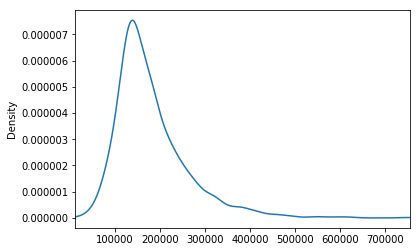

In [0]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()))

We can transform the entire distribution by converting each value to a z-score. In the next code block, we will:

- Convert each value to a z-score by using the **Series.apply()** method.
- Store the z-scores in a separate column named **z_prices**.
- Plot side by side the kernel density plot for the original values and the kernel density plot for the z-scores.


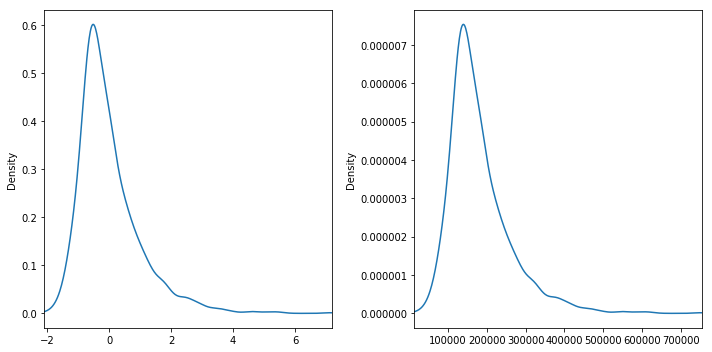

In [0]:
import matplotlib.pyplot as plt

mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(lambda x: ((x - mean) / st_dev))

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),houses['z_prices'].max()),ax=ax[0])
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()),ax=ax[1])
                            
plt.tight_layout() # otherwise the plots will overlay partially

Notice that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores. We'll dig more into why this happens in the next section. For now, let's find out what happens to the mean and the standard deviation when we convert all the values to z-scores.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- We've already transformed the distribution of the **SalePrice** variable to distribution of z-scores and saved the new values to a column named **z_prices**.
  - Compute the mean of the **z_prices** column and assign the result to a variable named **z_mean_price**.
  - Compute the standard deviation of the **z_prices** column and assign the result to a variable named **z_stdev_price**. Assume that you're computing the standard deviation for a population.
- Transform the distribution of the **Lot Area** variable into a distribution of z-scores.
  - Compute the mean of the new distribution of z-scores and assign the result to a variable named **z_mean_area**.
  - Compute the standard deviation of the new distribution of z-scores and assign the result to a variable named **z_stdev_area**. Assume that you're computing the standard deviation for a population.
- Compare the values of **z_mean_price** and **z_mean_area**. What do you observe? How can you explain that?
- Compare the values of **z_stdev_price** and **z_stdev_area**. What do you observe? How can you explain that?

In [0]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(lambda x: ((x - mean) / st_dev))

# put your code here

# 6 - The Standard Distribution

In the last exercise, the **mean** values were both extremely close to 0. For instance, we got a mean of -1.1429992333726227e-16 (notice the e-16 at the end) for the z-scores distribution of the **SalePrice** column. This number uses [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation#E-notation) to abbreviate what in full would be -0.0000000000000001429992333726227. Also, both the standard deviations were also very close to 1: 1.0000000000000002 and 0.9999999999999997.

In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1. We got slightly different values in the previous exercise because of small rounding errors. Let's now figure out why the mean is always 0 and standard deviation is always 1.

Consider the transformation of a normally-distributed population of sale prices with mean $\mu$  and standard deviation $\sigma$:

<img width="350" src="https://drive.google.com/uc?export=view&id=1Fhfa7zGAF8Kxxpxk7DPkWQescNM3zZ1v">


Notice that when we transform to z-scores, the initial values are practically relabeled and the relative location of each value in the distribution is perfectly preserved. This explains why the shape of the original distribution is preserved, and it also means that the location of the mean and the standard deviation is preserved as well.

The mean is located at 180000 in the initial distribution. In the z-score distribution, the mean has the same location, but now there's a value of 0 at that location because the z-score of 180000 is 0.

Notice that the value of the standard deviation (10000) is given by the difference between the value that is one standard deviation above the mean (190000) and the mean (180000): 190000-180000. After converting 190000 and 180000 to z-scores, the difference becomes 1-0=1, so the standard deviation of the z-score distribution is 1.

We denote with  $\mu_z$ the mean of a distribution of z-scores, and with $\sigma_z$ the standard deviation of a distribution of z-scores. We can show mathematically that $\mu_z = 0$  and  $\sigma_z = 1$  for any distribution of z-scores.

Because locations are preserved, $\mu_z$ is equal to the z-score of the mean $\mu$  in the original population. The z-score of $\mu$ is 0 for any value of  because:

$
\displaystyle \mu_z = \frac{\mu - \mu}{\sigma} = \frac{o}{\sigma} = 0
$


$\sigma_z$ is equal to the z-score of the first value that is one standard deviation above the mean (that would be 190000 in the example above). We can refer to the first value that is one standard deviation above the mean as $\mu + \sigma$, and we can see that the z-score of $\mu + \sigma$  is 1 for any value of $\mu$ and $\sigma$ :


$
\displaystyle \sigma_z = \frac{(\mu+\sigma) - \mu}{\sigma} = \frac{\sigma}{\sigma} =1
$

A distribution of z-scores is often called a **standard distribution** (remember that z-scores are also called **standard scores**). When we convert a distribution to z-scores, we'd say in statistical jargon that we **standardized** the distribution.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Standardize the population of values stored in the **population** variable and compute its mean $\mu_z$ and its standard deviation $\sigma_z$ .
  - Assign the value of $\mu_z$  to a variable named **mean_z**.
  - Assign the value of $\sigma_z$ to a variable named **stdev_z**.
  - This time we should get $\mu_z = 0$ and $\sigma_z = 1$  because there'll be no rounding errors.


In [0]:
from numpy import std, mean
population = [0,8,0,8]

# put your code here

# 7 - Standardizing Samples

Before digging into some of the applications of standardizing distributions, let's discuss some important details around standardizing samples. In the previous exercise, we found that $\mu_z = 0$ and $\sigma_z = 1$ for the distribution [0,8,0,8], which we assumed to be a population.

Let's instead treat it as a sample and proceed to standardize it. Because it's a sample, we'll use the formula for the sample standard deviation $s$  (the formula containing Bessel's correction):


In [0]:
from numpy import std, mean

sample = [0,8,0,8]
x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)

print(standardized_sample)

[-0.8660254037844387, 0.8660254037844387, -0.8660254037844387, 0.8660254037844387]


Notice that the mean of **standardized_sample** is 0, just like we'd expect, but the standard deviation is not 1:

In [0]:
mean(standardized_sample)

0.0

In [0]:
std(standardized_sample)

0.8660254037844387

Above, we measured the standard deviation using the formula for the population standard deviation $\sigma$ (the formula without Bessel's correction). But is it justified to use the formula for the population standard deviation?

When we standardize a sample, the resulting distribution of z-scores is itself a sample. This means that we need to use the formula for the sample standard deviation $s$  when we compute the standard deviation. Let's see if that makes the standard deviation equal to 1, just like we'd expect.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Compute the standard deviation of **standardized_sample** using the sample standard deviation formula, and assign the result to a variable named **stdev_sample**.
- Inspect the result to see if the standard deviation equals 1.

In [0]:
from numpy import std, mean
sample = [0,8,0,8]

x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
    
    
# put your code here

# 8 - Using Standardization for Comparisons

Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement. Let's say there are two companies in Ames which offer services in evaluating overall house quality. Inspectors from each company examine houses and rate them with an index score which describes the overall quality of the house.

The inspection itself is quite expensive, and a house owner generally asks the service from only one company. The problem is that each company has its own system of measuring overall quality, which results in index scores that are impossible to compare. We've coded under the hood some index scores and saved them in the columns **index_1** and **index_2**:

| |index_1 | index_2 | SalePrice |        
|---------|---------|-----------|--------|
| 0       | NaN     | -0.411111 | 215000 |
| 1       | 38.05   | NaN       | 105000 |
| 2       | NaN     | -0.888889 | 172000 |
| 3       | 39.44   | NaN       | 244000 |
| 4       | NaN     | -0.690000 | 189900 |


Let's suppose for a moment that these houses are not yet sold, and a client needs our help to choose between the first and the second house (from the table above). We want to begin with comparing index scores, but the first house has an index of -0.41111, the second's index is 38.05000, and the two indices come from different measurement systems, which makes them impossible to compare.

One thing the two systems have in common is that the index is directly proportional with the house quality — a lower index means lower quality, and a higher index means higher quality. To compare these indices coming from different measurement systems, we can:

- Standardize each distribution of index values (transform each index to a z-score).
Then compare the z-scores.
- Average houses will have z-scores around 0 in both distributions, good-quality houses will have z-scores significantly greater than 0, and low-quality houses will have z-scores significantly lower than 0.

For the sake of the example, **we're also under the strong assumption that both companies evaluate houses of all levels of quality**. If a company evaluates only low-quality houses, then the best of the low quality houses will have a z-score signficantly greater than 0, suggesting erroneously that they are high-quality.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Standardize the distributions of the **index_1** and **index_2** variables. We've coded these columns under the hood, and they're already part of the **houses** data set.
  - Assume that the values we have for both variables constitute populations.
  - Don't forget that each distribution has its own mean and standard deviation.
- Print the z-scores for the first two houses in the data set to find out which house has a better overall quality.
  - Assign your answer as a string to a variable named better — if the first house is better, assign 'first', otherwise assign 'second'.

In [0]:
# put your code here

# 9 - Converting Back from Z-scores

Previously, we standardized the **index_1** and **index_2** distributions and managed to solve our comparison task. Z-scores may not be always straightforward to work with or communicate to non-technical audiences, but fortunately we can convert them to other values that are more intuitive.

Remember that the formula for finding a z-score in a population is:

$
\displaystyle z = \frac{x - \mu}{\sigma}
$

With a little algebra we can show that $x = \sigma z + \mu$  (remember $x$ that  is the initial value).

We can use the $x = \sigma z + \mu$ formula to convert z-scores to more intuitive values. We already have the values for $z$, but what about $\mu$ and $\sigma$? We are actually free to choose any values we want for $\mu$ and $\sigma$. We want some more intuitive values for our two standardized distributions of index values, so let's choose $\mu = 50$  and $\sigma = 10$.


The first house has a z-score $z = 0.429742$, and applying $x = \sigma z + \mu$ for a mean $\mu = 50$  and a standard deviation $\sigma = 10$ , we get:

$
10 \times 0.429742 + 50 = 54.29742
$

Each z-score in the distribution will follow the same procedure — it'll be multiplied by 10 and then we'll add 50 to the result of the product. This means that the location of each z-score will be preserved perfectly — it's all a matter of relabeling. To make this transformation, notice that we took several steps:


- We standardized an initial distribution with a given  $\mu$ and $\sigma$ (we performed this step in the previous exercise when we standardized the distribution of **index_1** and **index_2**).
- We converted the standardized distribution to values that together have a different mean $\mu$ and standard deviation $\sigma$ than they did initially.


For any standardized distribution we can also convert the z-scores back to the original values. All we have to do is use the initial values for $\mu$ and $\sigma$  in the $x = \sigma z + \mu$ formula. However, it's more common in practice to transform the standardized distribution with convenient values for $\mu$  and  $\sigma$. One practical example include [transforming test scores for the SAT test](https://en.wikipedia.org/wiki/SAT#SAT-ACT_score_comparisons) using $\mu = 500$ and $\sigma = 100$ or [transforming IQ scores from different measurement systems](https://www.edubloxtutor.com/iq-test-scores/) using $\mu=100$  and $\sigma = 15$.

Notice that above we discussed only about populations, but the same reasoning applies to samples.



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Merge the two columns of z-scores together into a new column named **z_merged**.

| |z_1 | z_2       | z_merged  |           
|-----|-----------|-----------|-----------|
| 0   | NaN       | 0.429742  | 0.429742  |
| 1   | -0.935920 | NaN       | -0.935920 |
| 2   | NaN       | -0.114456 | -0.114456 |
| 3   | 0.786063  | NaN       | 0.786063  |

- Transform the standardized distribution of **z_merged** to a distribution with a $\mu =50$ and $\sigma=10$  using the formula $x = \sigma z + \mu$.
- Compute the mean of the newly transformed distribution — the mean should be 50, but expect some minor rounding errors.
  - Assign the result to a variable named **mean_transformed**.
- Compute the standard deviation of the newly transformed distribution — the standard deviation should be 10, but expect some minor rounding errors.
  - Assign the result to a variable named **stdev_transformed**.

In [0]:
# put your code here

# 10 - Next Steps

In this lesson, we learned to use z-scores to describe the location of a value within a distribution. We found that z-scores are useful for comparing values coming from different distributions with different means and standard deviations.

We also learned to standardize distributions and discussed a few situations where that might be useful. It's worth mentioning that standardization is also useful for some machine learning algorithms that we'll learn about in other courses in future. Also, z-scores in general are key elements in understanding confidence intervals and hypothesis testing.

# 11 - Extra exercises


## 11.1 Normal distribution deviation


One cool thing about normal distributions is that for every single one, the same percentage of the data is within one standard deviation of the mean, the same percentage is within two standard deviations of the mean, and so on.

About 68% of the data is within one standard deviation, roughly 95% is within two standard deviations, and about 99% is within three standard deviations.

This helps us quickly understand where values fall within the data set, as well as how typical or unusual they are.

In [0]:
# Housefly wing lengths in millimeters
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 
                42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 
                44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
                46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
                47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 
                50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]

# centrality variables
mean = sum(wing_lengths) / len(wing_lengths)
variances = [(i - mean) ** 2 for i in wing_lengths]
variance = sum(variances)/ len(variances)
standard_deviation = variance ** (1/2)

In [0]:
# distance to mean in standard deviation unit
standard_deviations = [(i - mean)/standard_deviation for i in wing_lengths]

In [0]:
def within_percentage(deviations, count):
    within = [i for i in deviations if -count <= i <= count]
    count = len(within)
    return count / len(deviations)

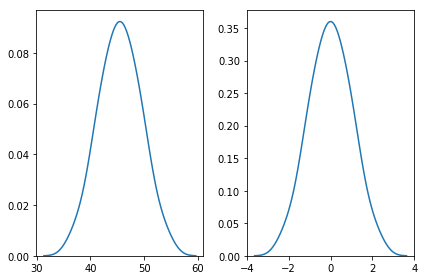

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a subfigure (1 row and 2 columns)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4))

# histogram of wing_lengths
sns.kdeplot(wing_lengths, ax=ax1)

# histogram of wing_lengths considering standard deviations
sns.kdeplot(standard_deviations, ax=ax2)

f.tight_layout()
plt.show()

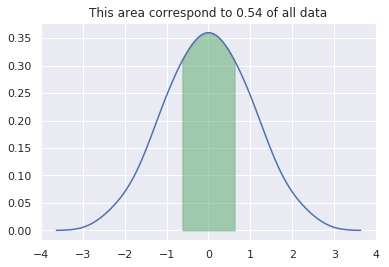

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# configure size of figure
sns.set(rc={'figure.figsize':(6,4)})

# How many elements are in [-X std unit, X std unit] of mean
distance = 0.6745
percentage = within_percentage(standard_deviations,distance)

# histogram of wing_lengths using standard_deviations
ax = sns.kdeplot(standard_deviations)

# get x & y points of histogram
x_points, y_points = ax.get_lines()[0].get_data()

# interval in standard deviations  
filter_ = np.logical_and(x_points >= -distance,x_points <= distance)

plt.fill_between(x_points[filter_], y_points[filter_],color='g',alpha=.5)
plt.title("This area correspond to " + str(percentage) + " of all data")
plt.show()

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. For each point in <span style="background-color: #F9EBEA; color:##C0392B">wing_lengths</span>, calculate the distance from the mean in number of standard deviations.
2. Calculate the proportion of the data that's within one standard deviation of the mean. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">within_one_percentage</span>.
3. Calculate the proportion of the data that's within two standard deviations of the mean. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">within_two_percentage</span>.
4. Calculate the proportion of the data that's within three standard deviations of the mean. Assign the result to <span style="background-color: #F9EBEA; color:##C0392B">within_three_percentage</span>.

## 11.2 Z-Table

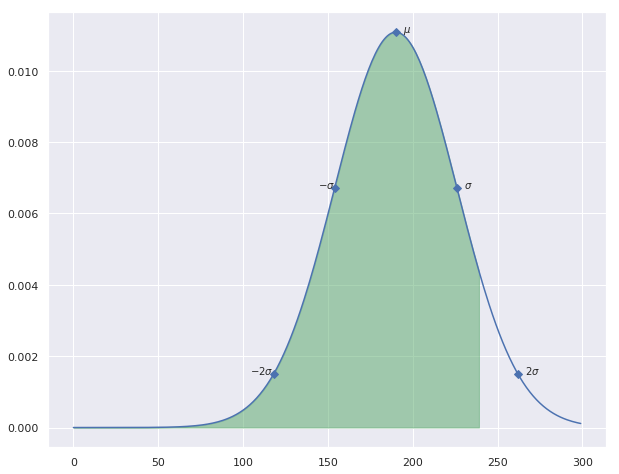

0.9175667301260455

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## points under study
xi = 240
mean_facebook = 190
std_facebook = 36
axis_x = range(0,300)

## return the cumulative value from Z-Table
cdf = stats.norm.cdf(xi,mean_facebook, std_facebook)

## -2std, -std, std, 2std 
minus2std = mean_facebook - 2*std_facebook
minusstd = mean_facebook - std_facebook
plus1std = mean_facebook + std_facebook
plus2std = mean_facebook + 2*std_facebook

## mark points in the plot
markers_points = [minus2std, minusstd, mean_facebook, plus1std, plus2std]

## find the probability distribution function
pdf = stats.norm.pdf(axis_x,mean_facebook,std_facebook)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf, '-bD',markevery=markers_points)
plt.annotate('$\mu$',xy=(mean_facebook+4,pdf[mean_facebook]))
plt.annotate('$-2\sigma$',xy=(minus2std-14,pdf[minus2std]))
plt.annotate('$-\sigma$',xy=(minusstd-10,pdf[minusstd]))
plt.annotate('$\sigma$',xy=(plus1std+4,pdf[plus1std]))
plt.annotate('$2\sigma$',xy=(plus2std+4,pdf[plus2std]))

## The shaded area is cdf at xi, in other words, cdf[240] = 0.9175667301260455
plt.fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)

plt.show()

cdf
